In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

This is the Simple Stock Algorithm in python. Here is a synopsis of the algorithm:
$$\hat{y}=\mu_n(t) + \omega \sigma_n(t)\text{, where n is the rolling window}$$

This algorithm takes the n-day moving average and the moving standard deviation, rolls this throughout the dataset and uses gradient descent to optimize the coefficient $\omega$ to minimize the loss function. Our loss function is the mean squared error:
$$\frac{1}{n}\sum^{n}_{i=1}(y - \hat{y})^2,\text{ }\hat{y} \text{ is the predicted value found in the algorithm.}$$

In [2]:
# Retrieve the Data and Establish Rolling Window:
data = np.random.normal(0,1,1000) # Data for SSA
data_series = pd.Series(data) # Convert Data to a Pandas Series
window = 3 # Rolling Window

# ------------------------- Data --------------------------------------
moving_avg = data_series.rolling(window).mean() # 3-Day Moving Average
moving_std = data_series.rolling(window).std()# 3-Day Standard Deviation
y = moving_avg + moving_std

# ------------------------ Gradient Descent --------------------------
def gradientDescent(y, mu, sigma, learningRate = 0.001, epochs = 1000):
  omega = 0.0 # Initialize Omega
  n = len(y) # Number of Data Points

  # Gradient Descent Loop
  for i in range(epochs):
    gradient = (-2 / n) * np.sum(sigma * (y - mu - omega * sigma))

  # Update Omega
  omega -= learningRate * gradient

  # Print Loss
  if epochs % 100 == 0:
    loss = np.mean((y - (mu + omega * sigma)) ** 2)
    print("--- Gradient Descent Output: ---")
    print("Epoch: ",epochs,"Loss: ",round(loss,3))

  return omega

# -----------
# Print to make sure the gradient descent algorithm works
omega = gradientDescent(data_series,moving_avg,moving_std)
print("Omega: ",omega)
# -----------


--- Gradient Descent Output: ---
Epoch:  1000 Loss:  0.598
Omega:  2.331699109020327e-05


The code above creates a dataset, creates the moving average and standard deviation to ensure the gradient descent runs successfully. Then, the gradient descent function takes the data, moving average (mu), moving standard deviation (sigma), the learning rate, and epochs (iterations) to retrieve the value of omega that minimizes the mean squared error.

In [3]:
# ------------------------ Stock Data Download -----------------------------
stock_data = yf.download('AAPL', period='3mo', interval='1d')
price = stock_data['Close']
#price = price.squeeze()

# -------------------------- SSA Function -------------------------------
def simpleStockAlgo(data=price,window=3):
  df = pd.DataFrame() # Initialize DataFrame
  df['OriginalData'] = data # Convert to Pandas Series
  df['MovingAvg'] = df['OriginalData'].rolling(window).mean() # 3-Day Moving Average
  df['MovingStd'] = df['OriginalData'].rolling(window).std()# 3-Day Standard Deviation
  omega = gradientDescent(df['OriginalData'],df['MovingAvg'],df['MovingStd'])# Gradient Descent
  df['SSA'] = df['MovingAvg'] + omega * df['MovingStd'] # SSA Output
  df['Error'] = df['OriginalData'] - df['SSA'] # Error
  # -------------------------- Diagnostics -----------------------------
  mse = np.mean(df['Error']**2)
  # ------------------------- Print Statements -------------------------
  print("Complete! Omega: ",omega)
  print("Mean Squared Error: ", mse)

  return df

# SSA Implimentation
stock_df = simpleStockAlgo(price)
stock_df


[*********************100%***********************]  1 of 1 completed


--- Gradient Descent Output: ---
Epoch:  1000 Loss:  4.319
Complete! Omega:  0.0018406376030299302
Mean Squared Error:  4.319057578506787


,OriginalData,MovingAvg,MovingStd,SSA,Error
Date,,,,,
2024-09-09,220.910004,NaN,NaN,NaN,NaN
2024-09-10,220.110001,NaN,NaN,NaN,NaN
2024-09-11,222.660004,221.226669,1.304161,221.229070,1.430934
2024-09-12,222.770004,221.846670,1.505005,221.849440,0.920565
2024-09-13,222.500000,222.643336,0.135772,222.643586,-0.143586
...,...,...,...,...,...
2024-12-02,239.589996,237.283330,2.330352,237.287620,2.302377
2024-12-03,242.649994,239.856664,2.670002,239.861579,2.788415
2024-12-04,243.009995,241.749995,1.879254,241.753454,1.256541


The code above creates a dataset and implements the simple stock algorithm on the dataset. The function takes the data and the rolling window as inputs. Then, the function creates a moving average, moving standard deviation, computes omega, computes $\mu(t)+\omega \cdot \sigma(t)$, and the error. All of these values will be placed in a data frame. The output of the function will be this data frame, omega, and the mean squared error of the simple stock algorithm.

Text(0, 0.5, 'Price')

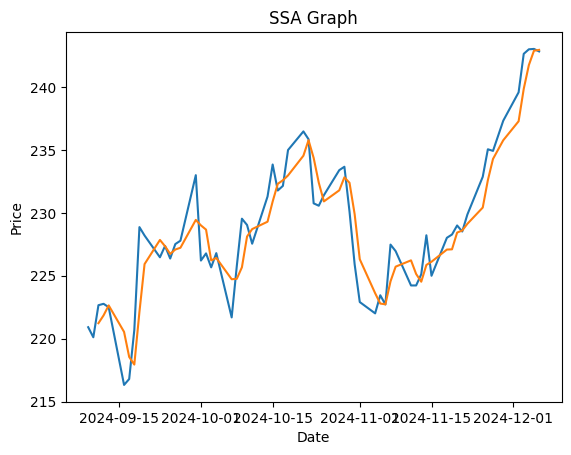

In [4]:
# Graph of SSA
plt.plot(stock_df['OriginalData'])
plt.plot(stock_df['SSA'])
plt.title('SSA Graph')
plt.xlabel('Date')
plt.ylabel('Price')